# Goals All Users

## Import Packages

In [2]:
# data analysis and wrangling
import pandas as pd
import numpy as np

# visualization
%matplotlib inline
import matplotlib.pyplot as plt

## Load Data

In [3]:
df = pd.read_csv('../data/NMP/metas/users_goals.csv', index_col='goal_id')

## Data Cleaning and Preparation

In [4]:
# Deleting the unnecesary columns
df = df.drop(columns=['recorded_hours', 'recorded_videos', 'recorded_evaluations', 'week', 'created_at', 'finish', 'start'])

In [5]:
# Grouping by user_id, with count of each group and average per attribute
df_users = df.groupby('user_id').agg({'user_id': 'count',
                                       'goal_hours': 'mean',
                                       'goal_videos': 'mean',
                                       'goal_evaluations': 'mean'})

In [6]:
# Renaming the columns
df_users = df_users.rename(columns={'user_id': 'number_goals',
                                    'goal_hours': 'average_goal_hours',
                                    'goal_videos': 'average_goal_videos',
                                    'goal_evaluations': 'average_goal_evaluations'})

## EDA: Exploratory Data Analysis

### Original Data Frame

In [7]:
# Features/Variable names
df.columns

Index(['user_id', 'goal_hours', 'goal_videos', 'goal_evaluations'], dtype='object')

In [8]:
# Preview the data
df.head(5)

,user_id,goal_hours,goal_videos,goal_evaluations
goal_id,,,,
37,141,3,4,1
23,139,1,6,6
32,172,4,7,2
40,200,2,3,0
39,200,1,4,0


In [9]:
# General data statistics without the user_id
df.drop(columns=['user_id']).describe()

,goal_hours,goal_videos,goal_evaluations
count,100.000000,100.000000,100.000000
mean,3.350000,4.310000,1.630000
std,5.017897,3.775773,1.375507
min,1.000000,0.000000,0.000000
25%,1.000000,2.000000,1.000000
50%,2.000000,4.000000,1.000000
75%,3.250000,5.250000,2.000000
max,40.000000,30.000000,8.000000


In [10]:
# Data Frame information (null, data type etc)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100 entries, 37 to 114
Data columns (total 4 columns):
user_id             100 non-null int64
goal_hours          100 non-null int64
goal_videos         100 non-null int64
goal_evaluations    100 non-null int64
dtypes: int64(4)
memory usage: 3.9 KB


### Goals by Users Data Frame

In [11]:
# Features/Variable names
df_users.columns

Index(['number_goals', 'average_goal_hours', 'average_goal_videos',
       'average_goal_evaluations'],
      dtype='object')

In [12]:
# Preview the data
df_users.head(5)

,number_goals,average_goal_hours,average_goal_videos,average_goal_evaluations
user_id,,,,
3,1,1.0,1.0,1.0
27,1,3.0,2.0,1.0
46,1,5.0,5.0,4.0
64,1,2.0,6.0,3.0
66,1,2.0,4.0,3.0


In [13]:
# General data statistics
df_users.describe()

,number_goals,average_goal_hours,average_goal_videos,average_goal_evaluations
count,67.000000,67.000000,67.000000,67.000000
mean,1.492537,3.606965,4.531095,1.799751
std,1.020593,5.885817,4.066985,1.391341
min,1.000000,1.000000,0.000000,0.000000
25%,1.000000,1.000000,2.000000,1.000000
50%,1.000000,2.000000,4.000000,1.000000
75%,2.000000,3.250000,5.291667,2.000000
max,7.000000,40.000000,30.000000,8.000000


In [14]:
# Data Frame information (null, data type etc)
df_users.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 67 entries, 3 to 761
Data columns (total 4 columns):
number_goals                67 non-null int64
average_goal_hours          67 non-null float64
average_goal_videos         67 non-null float64
average_goal_evaluations    67 non-null float64
dtypes: float64(3), int64(1)
memory usage: 2.6 KB


## Data Analysis and Visualizations

### Users with Goals

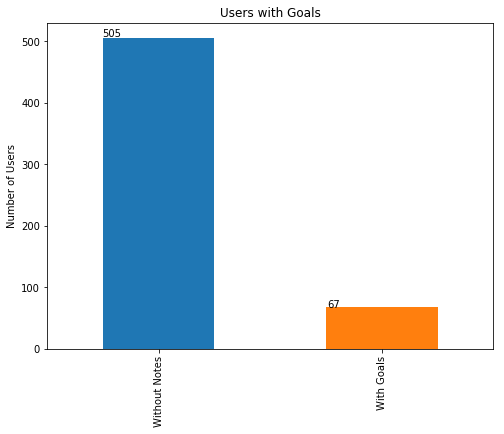

In [15]:
ax = pd.Series({'Without Notes': 572 - len(df_users), 'With Goals': len(df_users)}).plot(kind='bar', figsize=(8,6), title="Users with Goals")
ax.set_ylabel("Number of Users")

# Adding labels to the bars
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))

### Goals Frequencies

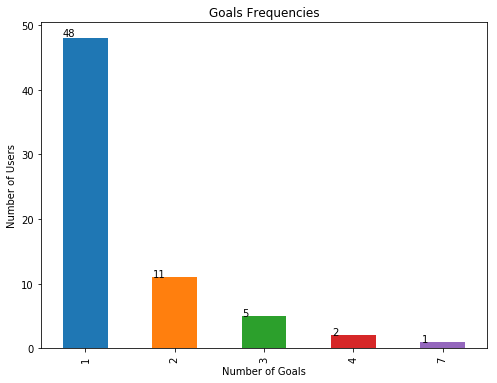

In [16]:
ax = df_users.number_goals.value_counts().plot(kind='bar', figsize=(8,6), title="Goals Frequencies")
ax.set_xlabel("Number of Goals")
ax.set_ylabel("Number of Users")

# Adding labels to the bars
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))

### Total Goals Hours

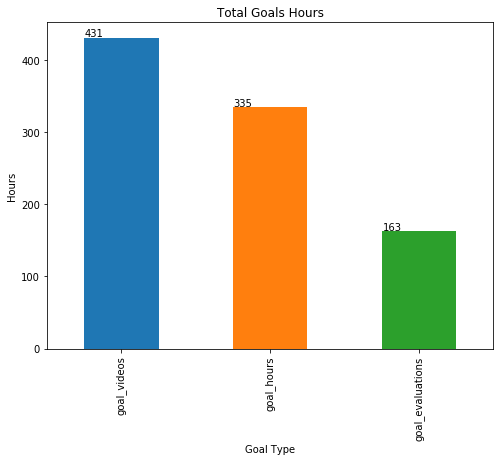

In [17]:
ax = df.drop(columns='user_id').sum().sort_values(ascending=False).plot(kind='bar', figsize=(8,6), title="Total Goals Hours")
ax.set_xlabel("Goal Type")
ax.set_ylabel("Hours")

# Adding labels to the bars
for p in ax.patches:
    ax.annotate(str(round(p.get_height(), 2)), (p.get_x() * 1.005, p.get_height() * 1.005))

### Average Goals

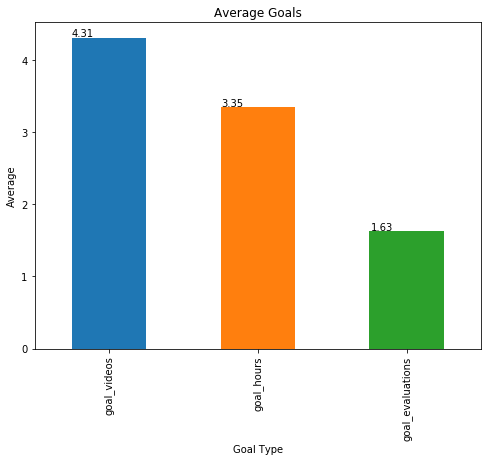

In [18]:
ax = df.drop(columns='user_id').mean().sort_values(ascending=False).plot(kind='bar', figsize=(8,6), title="Average Goals")
ax.set_xlabel("Goal Type")
ax.set_ylabel("Average")

# Adding labels to the bars
for p in ax.patches:
    ax.annotate(str(round(p.get_height(), 2)), (p.get_x() * 1.005, p.get_height() * 1.005))

### Average Goals by Users

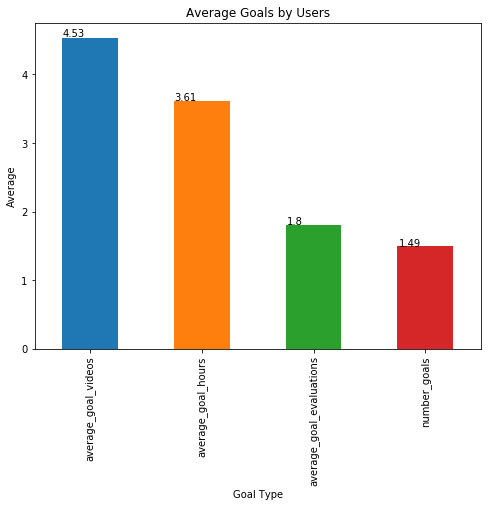

In [22]:
ax = df_users.mean().sort_values(ascending=False).plot(kind='bar', figsize=(8,6), title="Average Goals by Users")
ax.set_xlabel("Goal Type")
ax.set_ylabel("Average")

# Adding labels to the bars
for p in ax.patches:
    ax.annotate(str(round(p.get_height(), 2)), (p.get_x() * 1.005, p.get_height() * 1.005))

## Export Data

In [20]:
df_users.to_csv('../data/NMP/cooked_data_all_users/goals_by_user.csv', index_label='user_id')

In [21]:
df.to_csv('../data/NMP/cooked_data_all_users/goals.csv', index_label='goal_id')